In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
dados = pd.DataFrame(pd.read_csv('/content/sample_data/vgsales.csv'))
dados.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [49]:
dados.rename(columns = {'Name':'Nome','Platform':'Plataforma','Year':'Ano','Genre':'Genero','Publisher':'Desenvolvedora',
                       'Global_Sales':'Total','Other_Sales':'Outras_Vendas'}, inplace = True)
dados.head(3)

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [23]:
dados = dados[(dados.Ano >= 2006.0) & (dados.Ano <= 2006.0)]

In [50]:
dados['Percentual_EU'] = (dados['EU_Sales'] / dados['Total']).round(2)
dados

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total,Percentual_EU
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.35
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.09
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.36
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.33
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,0.00
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,0.00
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.00
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,1.00


In [7]:
dados.dtypes

Rank                int64
Nome               object
Plataforma         object
Ano               float64
Genero             object
Desenvolvedora     object
NA_Sales          float64
EU_Sales          float64
JP_Sales          float64
Outras_Vendas     float64
Total             float64
Percentual_EU     float64
dtype: object

In [8]:
Desenvolvedoras = pd.DataFrame(dados.Desenvolvedora.value_counts())
Desenvolvedoras.sort_values(by = 'Desenvolvedora', ascending = False, inplace = True)
Desenvolvedoras.reset_index(inplace = True)
Desenvolvedoras.rename(columns = {'index':'Desenvolvedora','Desenvolvedora':'Qtd'}, inplace = True)
Desenvolvedoras['Qtd'] = np.array(Desenvolvedoras['Qtd']).astype(int)
Desenvolvedoras = Desenvolvedoras.head(10)

Text(0.5, 1.0, 'Maiores Quantidades de desenvolvedoras de jogos em 2006')

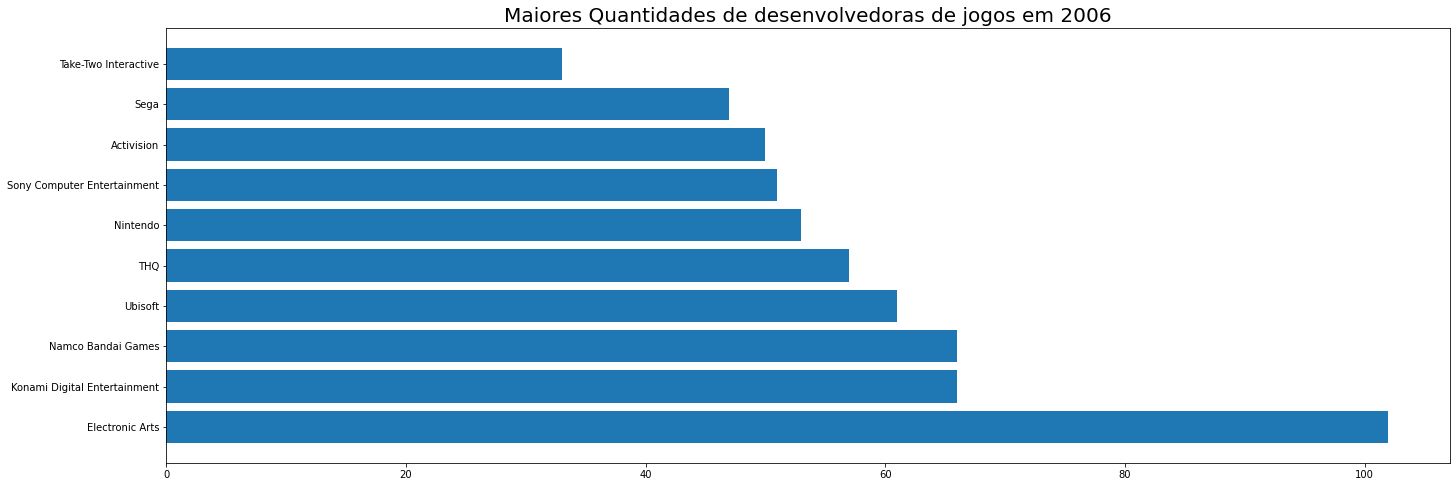

In [9]:
plt.figure(figsize = (23,8))
plt.barh(Desenvolvedoras.Desenvolvedora,Desenvolvedoras.Qtd)
plt.title('Maiores Quantidades de desenvolvedoras de jogos em 2006', fontsize = 20)

In [51]:
dados.groupby('Genero')['Total'].max() #Agrupando por genero e maior quantidade

Genero
Action          21.40
Adventure       11.18
Fighting        13.04
Misc            29.02
Platform        40.24
Puzzle          30.26
Racing          35.82
Role-Playing    31.37
Shooter         28.31
Simulation      24.76
Sports          82.74
Strategy         5.45
Name: Total, dtype: float64

In [56]:
# dados.groupby(['Ano'], sort=False)['Total'].max()

In [57]:
idx = dados.groupby(['Ano'])['Total'].transform(max) == dados['Total']
idx = dados[idx].sort_values(by ='Ano', ascending = False)
idx.head(10)
#Primeiros 10 jogos mais vendidos por ano

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total,Percentual_EU
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29,0.00
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03,0.00
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77,0.79
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,0.41
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98,0.48
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,0.43
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03,0.42
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,0.29
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,0.23
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.33


In [58]:
idx = pd.DataFrame(idx)